 <b>About the Dataset<b>

The American Sign Language (ASL) dataset is designed specifically for gesture recognition, focusing on the classification and interpretation of hand gestures used in ASL. This dataset includes a variety of images and video frames that represent each letter of the ASL alphabet, which can be used for building models that recognize and classify gestures. Gesture recognition is a key application within computer vision and image analytics, and this dataset provides the necessary resources to train and evaluate models for recognizing hand shapes and movements associated with ASL gestures.

In the context of gesture recognition, the dataset allows for the development of systems that can interpret ASL gestures in real-time, enabling applications such as sign language translation, communication aids for the hearing impaired, and interactive systems that require gesture-based input.

Dataset Link: https://kaggle.com/datasets/ayuraj/asl-dataset/discussion?sort=undefined

<b>Objective<b>

The main goal of this dataset is to support the development of gesture recognition systems that can interpret and classify ASL hand gestures. The dataset is well-suited for various types of machine learning tasks, including:

Image-Based Gesture Recognition: Classifying individual ASL gestures from still images.
Real-Time Gesture Recognition: Using video data to identify dynamic hand movements and continuous gestures.
Gesture Tracking: Recognizing and tracking hand gestures across multiple frames in videos.
The dataset provides all the necessary resources to develop real-time gesture recognition systems that can assist in sign language translation, improving accessibility for people with hearing impairments.

In [4]:
pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [5]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


<b>Preprocessing for Gesture Recognition<b>

In [ ]:

def preprocess_images_and_plot(dataset_path, save_path, image_size=(28, 28)):
    data = []
    labels = []
    
    # Create a directory to save the preprocessed images outside the original folder
    os.makedirs(save_path, exist_ok=True)

    # Loop through each directory (digit/letter folder)
    for folder_name in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder_name)

        if os.path.isdir(folder_path):
            # Create subfolders for each digit/letter in the save_path
            os.makedirs(os.path.join(save_path, folder_name), exist_ok=True)

            # Loop through each image in the folder
            for image_name in os.listdir(folder_path):
                image_path = os.path.join(folder_path, image_name)

                # Read the image
                image = cv2.imread(image_path)

                if image is None:
                    print(f"Warning: Unable to read image {image_path}")
                    continue

                # print(f"Processing {image_path}...")  # Debugging print

                # Convert the image to grayscale (this is the original image)
                original_gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                # Resize the image to the desired size (e.g., 28x28 for MNIST-like data)
                resized_image = cv2.resize(original_gray_image, image_size)

                # Thresholding (convert to binary image)
                _, binary_image = cv2.threshold(resized_image, 128, 255, cv2.THRESH_BINARY)

                # Morphological operations
                kernel = np.ones((3, 3), np.uint8)
                eroded_image = cv2.erode(binary_image, kernel, iterations=1)
                dilated_image = cv2.dilate(eroded_image, kernel, iterations=1)

                # Advanced morphological operations
                opened_image = cv2.morphologyEx(dilated_image, cv2.MORPH_OPEN, kernel)
                closed_image = cv2.morphologyEx(dilated_image, cv2.MORPH_CLOSE, kernel)
                gradient_image = cv2.morphologyEx(dilated_image, cv2.MORPH_GRADIENT, kernel)
                tophat_image = cv2.morphologyEx(dilated_image, cv2.MORPH_TOPHAT, kernel)
                blackhat_image = cv2.morphologyEx(dilated_image, cv2.MORPH_BLACKHAT, kernel)

                # Create a subplot to display the original and processed images
                fig, axs = plt.subplots(3, 3, figsize=(15, 15))

                # Original image (from dataset before any transformations)
                axs[0, 0].imshow(original_gray_image, cmap='gray')
                axs[0, 0].set_title('Original Image')
                axs[0, 0].axis('off')

                # Resized image
                axs[0, 1].imshow(resized_image, cmap='gray')
                axs[0, 1].set_title('Resized Image')
                axs[0, 1].axis('off')

                # Binary image
                axs[0, 2].imshow(binary_image, cmap='gray')
                axs[0, 2].set_title('Binary Image')
                axs[0, 2].axis('off')

                # Eroded image
                axs[1, 0].imshow(eroded_image, cmap='gray')
                axs[1, 0].set_title('Eroded Image')
                axs[1, 0].axis('off')

                # Dilated image
                axs[1, 1].imshow(dilated_image, cmap='gray')
                axs[1, 1].set_title('Dilated Image')
                axs[1, 1].axis('off')

                # Opened image
                axs[1, 2].imshow(opened_image, cmap='gray')
                axs[1, 2].set_title('Opened Image')
                axs[1, 2].axis('off')

                # Closed image
                axs[2, 0].imshow(closed_image, cmap='gray')
                axs[2, 0].set_title('Closed Image')
                axs[2, 0].axis('off')

                # Gradient image
                axs[2, 1].imshow(gradient_image, cmap='gray')
                axs[2, 1].set_title('Gradient Image')
                axs[2, 1].axis('off')

                # Top Hat image
                axs[2, 2].imshow(tophat_image, cmap='gray')
                axs[2, 2].set_title('Top Hat Image')
                axs[2, 2].axis('off')

                # Save the plot as an image in the processed folder
                processed_image_path = os.path.join(save_path, folder_name, f"{image_name.split('.')[0]}_processed.png")
                plt.savefig(processed_image_path)
                plt.close(fig)

                # Flatten the final processed image (you can choose which one to flatten)
                final_image = gradient_image
                data.append(final_image.flatten())
                
                # Append the label (digit/letter)
                labels.append(folder_name)

    return np.array(data), np.array(labels)

# Define the dataset path and where to save preprocessed images
dataset_path = r'asl_dataset\asl_dataset'
save_path = r'processed_images'  # Save the preprocessed images here, outside the original folder

# Preprocess the images and plot/save them
X, y = preprocess_images_and_plot(dataset_path, save_path)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, scale pixel values (normalize between 0 and 1)
X_train = X_train / 255.0
X_test = X_test / 255.0


In the provided code, a series of preprocessing steps have been applied to each image in the Hand Gesture Recognition Dataset. Below is a summary of each preprocessing step:
1. Grayscale Conversion: Convert the image to grayscale to simplify the analysis by reducing color complexity.
2. Resizing: Resize the image to a fixed dimension (28x28 pixels) for consistency in input size.
3. Thresholding (Binary Conversion): Convert the image into a binary format (black and white) to highlight key structures.
4. Erosion: Shrink the white areas in the image to remove noise and improve clarity.
5. Dilation: Expand the white areas in the image to restore the original size of the gesture.
6. Morphological Opening: Remove small noise from the image by combining erosion followed by dilation.
7. Morphological Closing: Fill small gaps or holes in the hand gesture by combining dilation followed by erosion.
8. Morphological Gradient: Highlight edges of the hand gesture by calculating the difference between dilation and erosion.
9. Top Hat Transformation: Extract small bright features in the image that are brighter than the surrounding area.
10. Black Hat Transformation: Extract small dark features in the image that are darker than the surrounding area.

These preprocessing steps, applied to each image in the dataset, help improve the quality and consistency of the input data, which in turn enhances the performance of machine learning models for hand gesture recognition.

<b>Displaying a sample image<b>

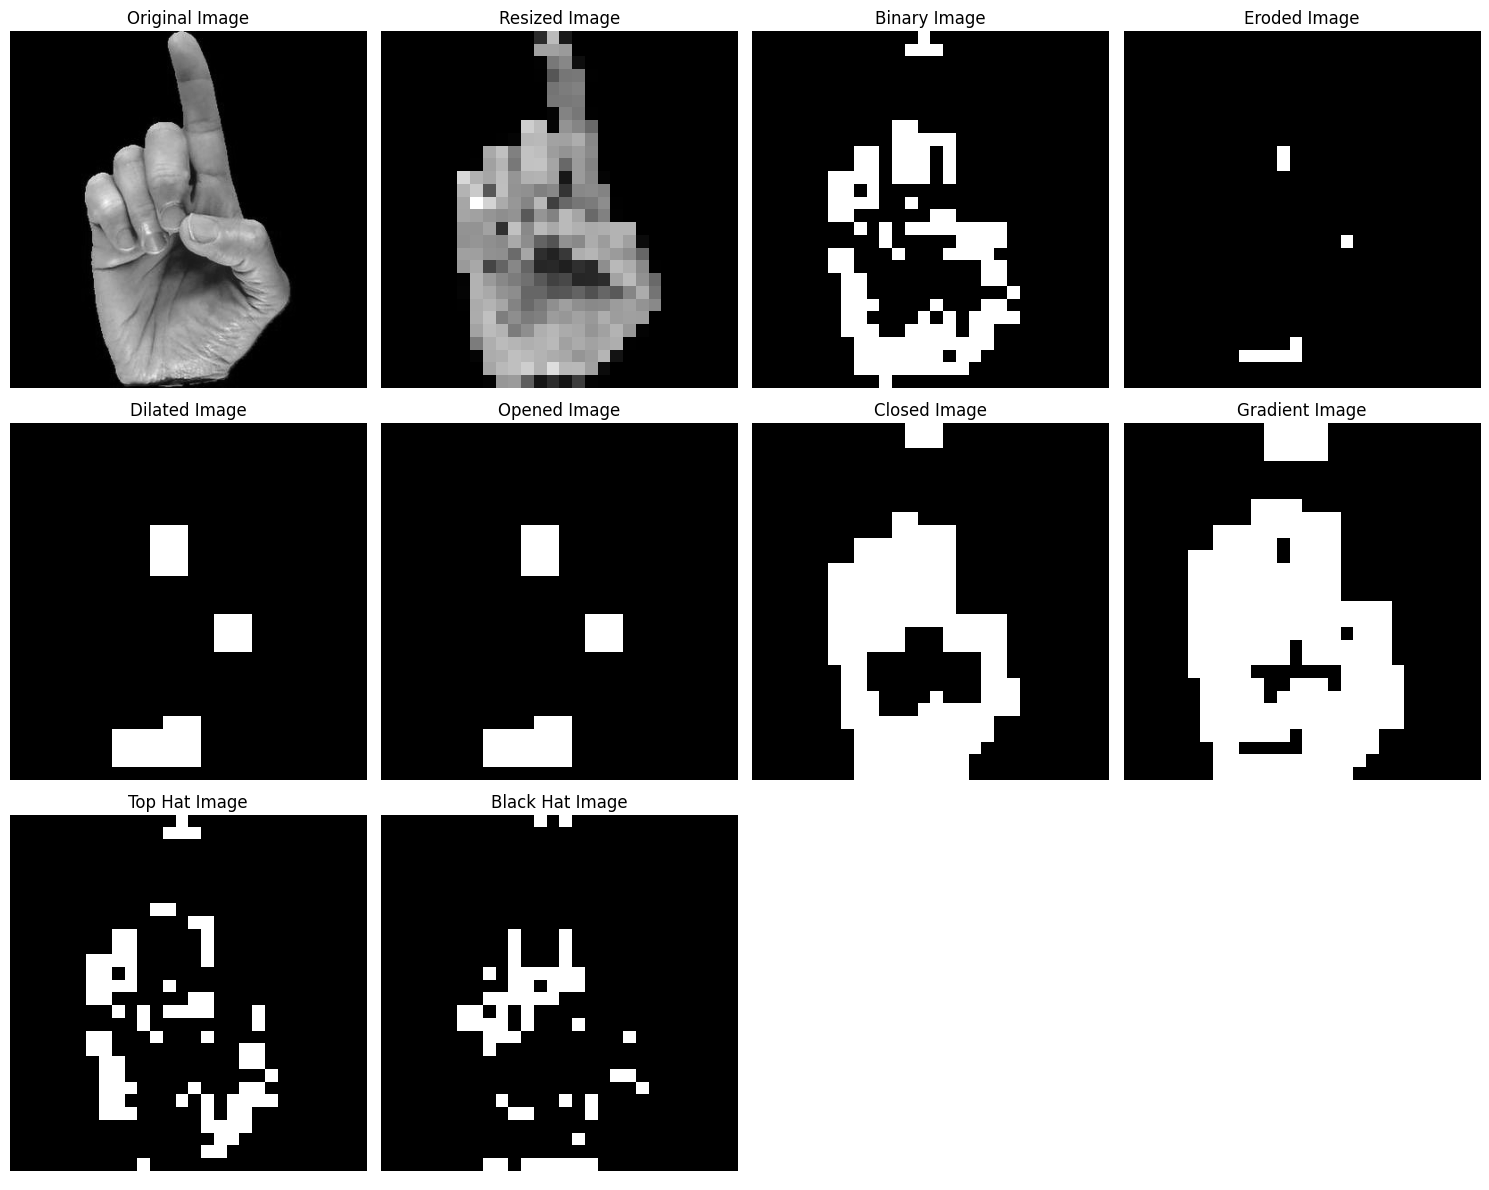

In [ ]:


# Function to perform preprocessing and generate transformations
def preprocess_image(image_path, image_size=(28, 28)):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize the image to the desired size (e.g., 28x28)
    resized_image = cv2.resize(gray_image, image_size)

    # Thresholding (convert to binary image)
    _, binary_image = cv2.threshold(resized_image, 128, 255, cv2.THRESH_BINARY)

    # Apply morphological operations
    kernel = np.ones((3, 3), np.uint8)
    
    # Erosion
    eroded_image = cv2.erode(binary_image, kernel, iterations=1)
    
    # Dilation
    dilated_image = cv2.dilate(eroded_image, kernel, iterations=1)
    
    # Opening (erosion followed by dilation)
    opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
    
    # Closing (dilation followed by erosion)
    closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

    # Gradient (difference between dilation and erosion)
    gradient_image = cv2.morphologyEx(binary_image, cv2.MORPH_GRADIENT, kernel)
    
    # Top Hat (original image minus the opened image)
    top_hat_image = cv2.morphologyEx(binary_image, cv2.MORPH_TOPHAT, kernel)
    
    # Black Hat (closed image minus the original image)
    black_hat_image = cv2.morphologyEx(binary_image, cv2.MORPH_BLACKHAT, kernel)

    # Return all processed images
    return gray_image, resized_image, binary_image, eroded_image, dilated_image, opened_image, closed_image, gradient_image, top_hat_image, black_hat_image

# Function to plot and show all preprocessing steps for a sample image
def plot_preprocessing_steps(image_path):
    # Preprocess the sample image
    gray_image, resized_image, binary_image, eroded_image, dilated_image, opened_image, closed_image, gradient_image, top_hat_image, black_hat_image = preprocess_image(image_path)

    # Create a subplot to display all transformations
    fig, axs = plt.subplots(3, 4, figsize=(15, 12))

    # Original Image (Grayscale)
    axs[0, 0].imshow(gray_image, cmap='gray')
    axs[0, 0].set_title('Original Image')
    axs[0, 0].axis('off')

    # Resized Image
    axs[0, 1].imshow(resized_image, cmap='gray')
    axs[0, 1].set_title('Resized Image')
    axs[0, 1].axis('off')

    # Binary Image
    axs[0, 2].imshow(binary_image, cmap='gray')
    axs[0, 2].set_title('Binary Image')
    axs[0, 2].axis('off')

    # Eroded Image
    axs[0, 3].imshow(eroded_image, cmap='gray')
    axs[0, 3].set_title('Eroded Image')
    axs[0, 3].axis('off')

    # Dilated Image
    axs[1, 0].imshow(dilated_image, cmap='gray')
    axs[1, 0].set_title('Dilated Image')
    axs[1, 0].axis('off')

    # Opened Image
    axs[1, 1].imshow(opened_image, cmap='gray')
    axs[1, 1].set_title('Opened Image')
    axs[1, 1].axis('off')

    # Closed Image
    axs[1, 2].imshow(closed_image, cmap='gray')
    axs[1, 2].set_title('Closed Image')
    axs[1, 2].axis('off')

    # Gradient Image
    axs[1, 3].imshow(gradient_image, cmap='gray')
    axs[1, 3].set_title('Gradient Image')
    axs[1, 3].axis('off')

    # Top Hat Image
    axs[2, 0].imshow(top_hat_image, cmap='gray')
    axs[2, 0].set_title('Top Hat Image')
    axs[2, 0].axis('off')

    # Black Hat Image
    axs[2, 1].imshow(black_hat_image, cmap='gray')
    axs[2, 1].set_title('Black Hat Image')
    axs[2, 1].axis('off')

    # Hide empty subplots
    for ax in axs.flat:
        if not ax.has_data():
            ax.axis('off')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Example: Path to a sample image
sample_image_path = r"asl_dataset\d\hand1_d_bot_seg_1_cropped.jpeg"

# Call the function to plot all preprocessing steps for the sample image
plot_preprocessing_steps(sample_image_path)


<b>Conclusion<b>

In this preprocessing pipeline, each image from the dataset was subjected to a series of transformations, including grayscale conversion, resizing, thresholding, and various morphological operations like erosion, dilation, opening, closing, gradient, top hat, and black hat. These steps were applied to enhance the key features of the hand gestures, making them suitable for recognition.

As demonstrated with the ample images displayed, this preprocessing method was consistently applied to all images in the dataset, including those representing digits (0-9) and letters (A-Z). Each image was processed, transformed, and prepared for model input, ensuring that the dataset is optimized for gesture recognition tasks.